In [288]:
# 必要ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [289]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print(len(df.columns))
print(df.columns)

print(df.shape)
print(df_test.shape)

81
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [290]:
# trainデータの欠損値
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [291]:
# testデータの欠損値
df_test.isnull().sum()[df_test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

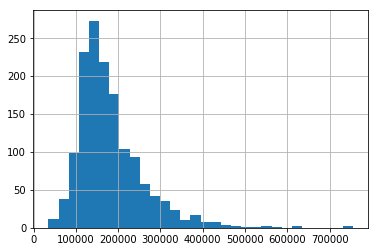

In [292]:
df['SalePrice'].hist(bins=30)
plt.show()

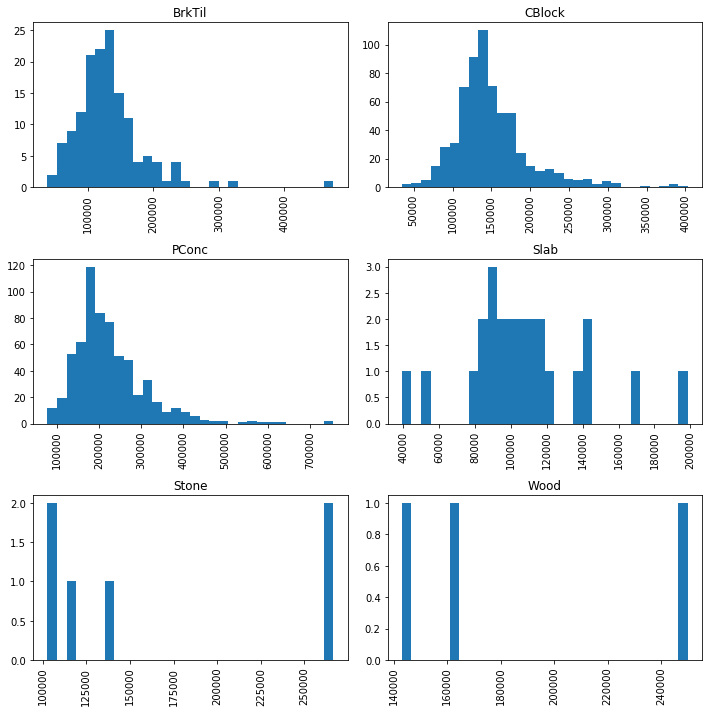

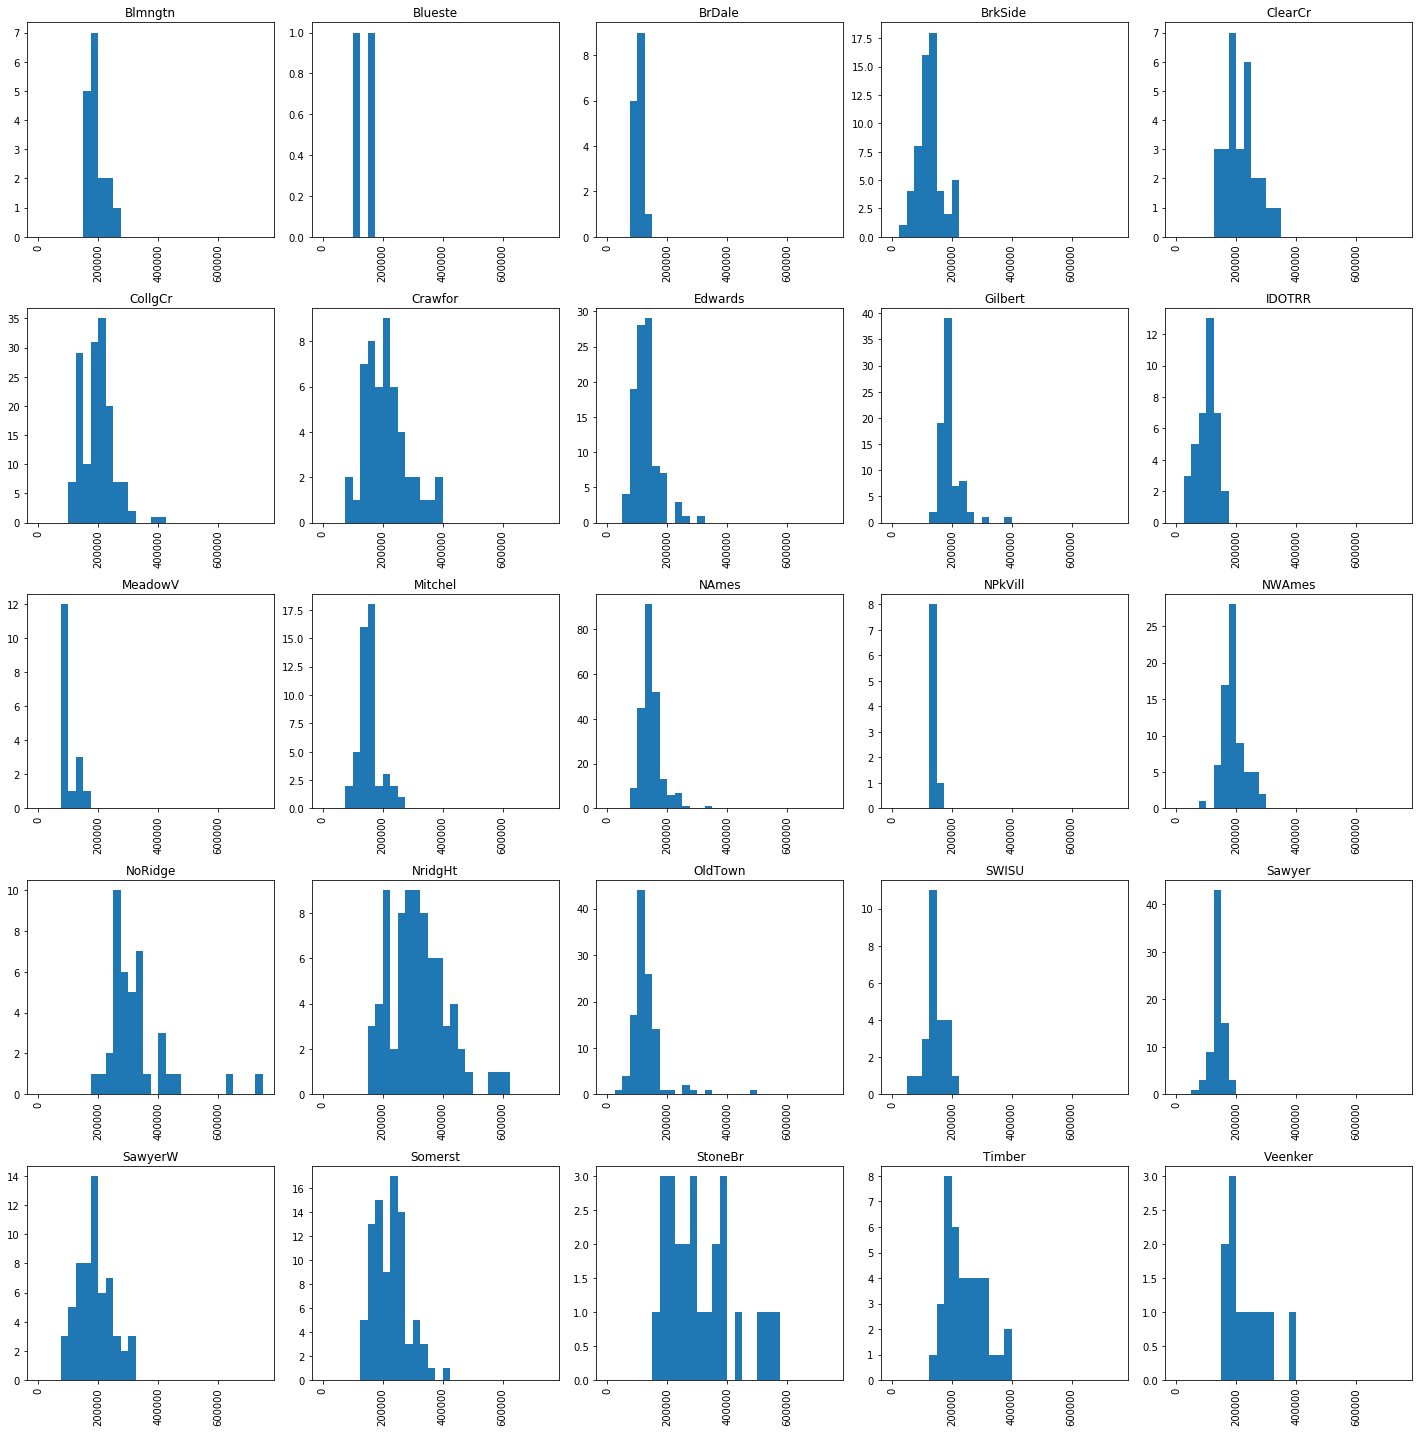

In [293]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 10 # グラフが見きれないようにするためサイズを大きくしておく
df['SalePrice'].hist(bins=30,by=df['Foundation'])
plt.tight_layout()
plt.show()

rcParams['figure.figsize'] = 20, 20 
df['SalePrice'].hist(bins=30, range=(0, 750000),by=df['Neighborhood'])
plt.tight_layout()
plt.show()

In [294]:
# Foundationと整数を対応させる辞書を生成
Foundation_mapping = {'BrkTil':1, 'CBlock':2, 'PConc':3, 'Slab':0, 'Stone':2, 'Wood':2}
# マッピングの実行
df['Foundation'] = df['Foundation'].map(Foundation_mapping)
df_test['Foundation'] = df_test['Foundation'].map(Foundation_mapping)

# Neighborhoodと整数を対応させる辞書を生成
Neighborhood_mapping = {'Blueste':0, 'BrDale':0, 'BrkSide':0, 'MeadowV':0, 'IDOTRR':0, 'NPkVill':0, 'Sawyer':0, 'SWISU':0, 'OldTown':0, 'Edwards':0, 'Mitchel':0, 'Blmngtn':1, 'Gilbert':1, 'CollgCr':1, 'SawyerW':1, 'NAmes':0, 'Somerst':1, 'ClearCr':1, 'NWAmes':1, 'Crawfor':1, 'Veenker':1, 'Timber':1, 'NridgHt':2, 'NoRidge':2, 'StoneBr':2}
# マッピングの実行
df['Neighborhood'] = df['Neighborhood'].map(Neighborhood_mapping)
df_test['Neighborhood'] = df_test['Neighborhood'].map(Neighborhood_mapping)


#建築年を築年数に変換
df['YearBuilt'] = 2010 - df['YearBuilt']
df_test['YearBuilt'] = 2010 - df_test['YearBuilt']

#testデータの欠損値補完
df_test['GarageCars'].fillna(df_test['GarageCars'].mean(), inplace=True)

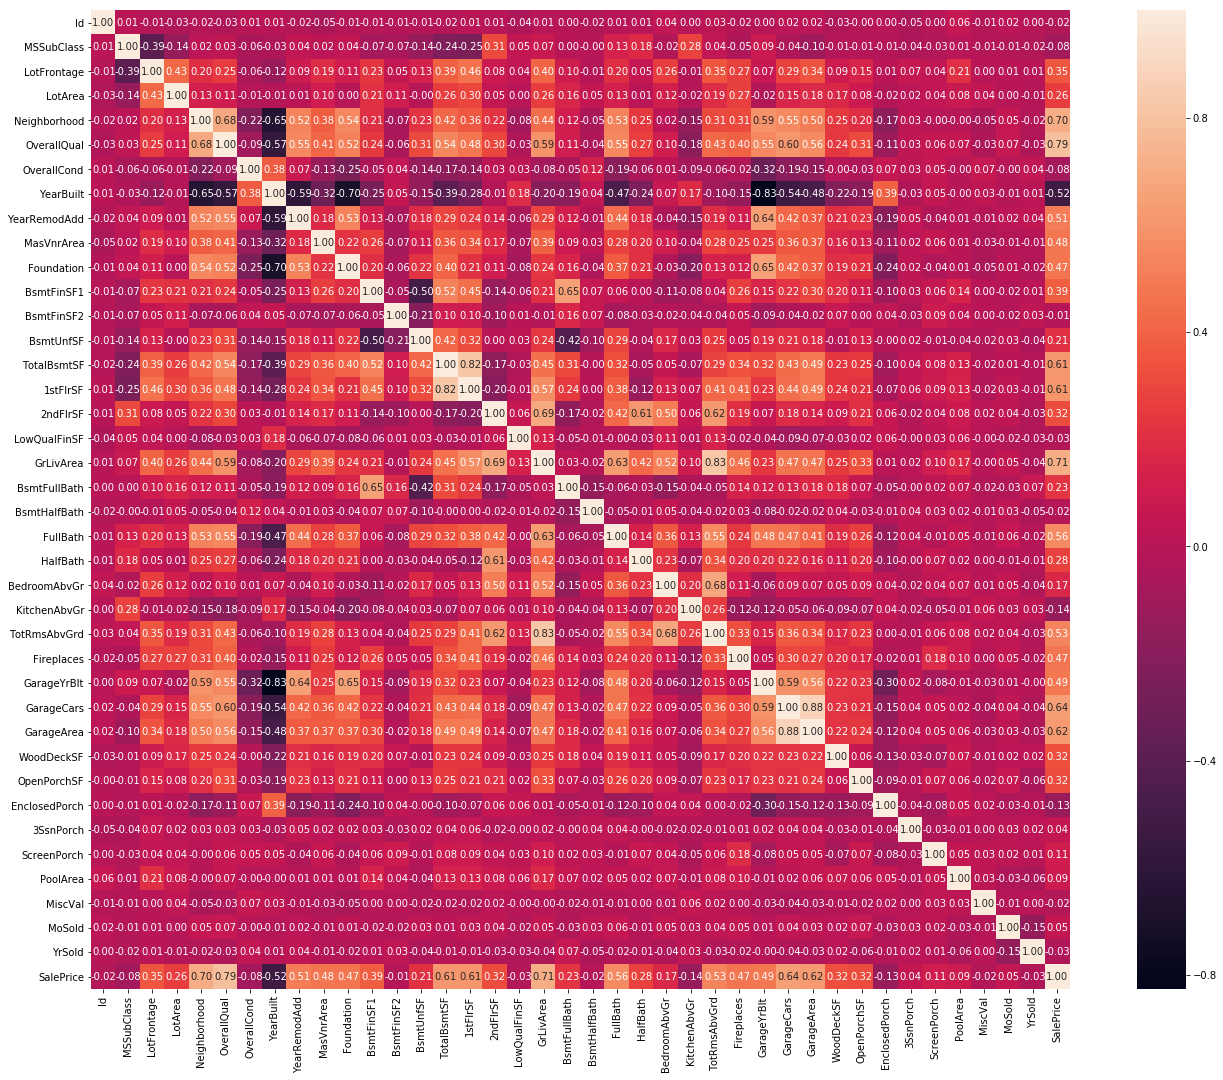

In [295]:
import seaborn as sns

# ヒートマップの表示
plt.figure(figsize=(24, 18))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [296]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.loc[:,['OverallQual','GrLivArea','GarageCars','Neighborhood']].values
y = df.loc[:, ['SalePrice']].values.reshape(-1)


# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rfr = RandomForestRegressor(1000)  # インスタンスの生成　木の数を1000個に指定
rfr.fit(X_train, y_train)            # 学習実行


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [297]:
importances = rfr.feature_importances_
importances

array([0.56602331, 0.28909417, 0.06299222, 0.0818903 ])

In [298]:
# 予測値を計算
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

MSE train : 210141828.592, test : 1273293808.190
R^2 train : 0.966, test : 0.812


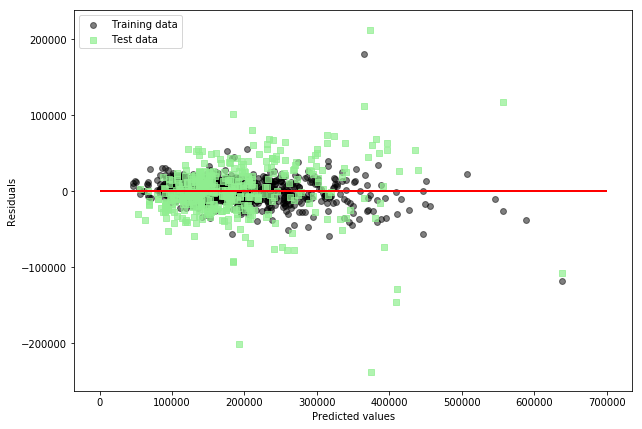

In [299]:
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 700000, lw = 2, color = 'red')
plt.show()

In [300]:
# testデータからデータの取り出し
test_data = df_test.loc[:, ['OverallQual','GrLivArea','GarageCars','Neighborhood']].values

# 提出データの予測
y_pred = rfr.predict(test_data)

In [301]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'Id' : df_test['Id'], 'SalePrice' : y_pred})
submit_file.to_csv('submit.csv', index = False)